In [1]:
#import all required libraries etc

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
#load the data and check it out

data = pd.read_csv('mass_balance_series.csv',index_col='glacier name')
data.head()

,lat,lon,1952,1953,1954,1955,1956,1957,1958,1959,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
glacier name,,,,,,,,,,,,,,,,,,,,,
Leviy Aktru,50.08,87.72,-0.039076,-0.387148,0.407494,-0.742612,0.167912,-0.152999,0.394102,-0.202603,...,-0.200645,-0.230936,-0.283459,-0.459948,0.294576,0.161884,-0.278179,-0.816668,0.200415,0.111513
Maliy aktru,50.04,87.74,0.005217,-0.219182,0.417785,-0.501317,0.223608,-0.093815,0.362094,-0.143881,...,-0.151372,-0.098519,-0.195602,-0.310556,0.295370,0.157705,-0.193454,-0.613413,0.185756,0.123379
Praviy,50.08,87.73,0.344194,-0.127647,0.801366,-0.305893,0.668040,0.169110,0.779003,0.068945,...,0.144794,0.067226,-0.012977,-0.147379,0.614224,0.605467,0.087284,-0.678764,0.410575,0.648320
Shumskiy,45.08,80.23,-0.044246,-1.018890,0.050857,-0.979030,-0.463213,-0.960928,0.149613,-0.669871,...,-0.978870,-0.967204,-0.607208,-1.943291,-0.549278,-0.391488,-0.742038,-1.436223,-0.642389,-1.309745
Muravlev,45.10,80.23,-0.873740,-1.146919,-0.570185,-1.546340,-1.127734,-1.141556,-0.482739,-1.018809,...,-1.575951,-1.405327,-1.199761,-2.303764,-0.963703,-1.101539,-1.352273,-1.781058,-1.132839,-1.761882


In [3]:
#take out lat/lon for plotting

lat = data['lat']
lon = data['lon']

data = data.drop(['lat','lon'],axis=1)
data.head() #check to see if lat/lon are removed from data

minYear = np.int(list(data.columns)[0]) #first year of data
maxYear = np.int(list(data.columns)[-1]) #final year of data

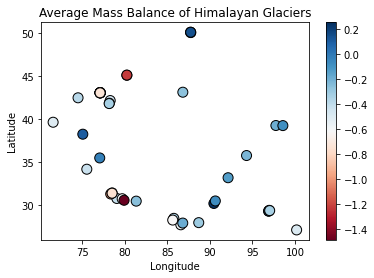

In [4]:
#plot mean mass balance for each glacier

plt.scatter(lon, lat,
            c = data.mean(axis=1),
            cmap = 'RdBu',
            edgecolor='k',
            s = 100)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Average Mass Balance of Himalayan Glaciers')
plt.colorbar()
plt.show()

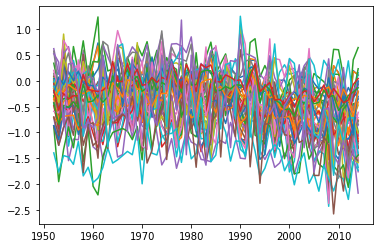

In [5]:
#plot all time series to see what the data is that we're working with here

plt.plot(range(minYear,maxYear+1),data.T)
plt.show()

#note that data is on same scale, and since we are interested in the raw values (and not the relative shapes), we won't normalize.

What are the characteristic temporal patterns of glacier mass balance for this region?  How are these temporal patterns expressed spatially (i.e. for each of these 45 glaciers)?  Hint: eigenvectors here are the temporal patterns (m=63 years), while PCs are glaciers (n=45).

In [6]:
#do PCA 
# note that we expect in this case m=63 modes, but PCA in python by default gives 
# the smaller of the two dimensions (m,n) as the default number of modes
# so in this case we'd get 45 modes even though we set the data with m=63
# this is becasue the modes from 45 to 63 carry zero variance, so PCA function has excluded these modes
n_modes = np.min(np.shape(data))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

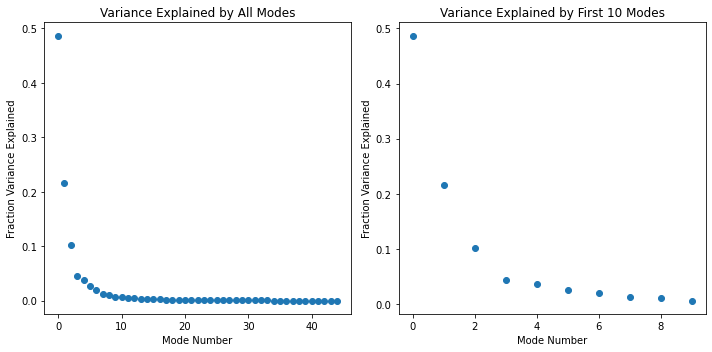

In [7]:
#plot fraction of variance explained by each mode

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

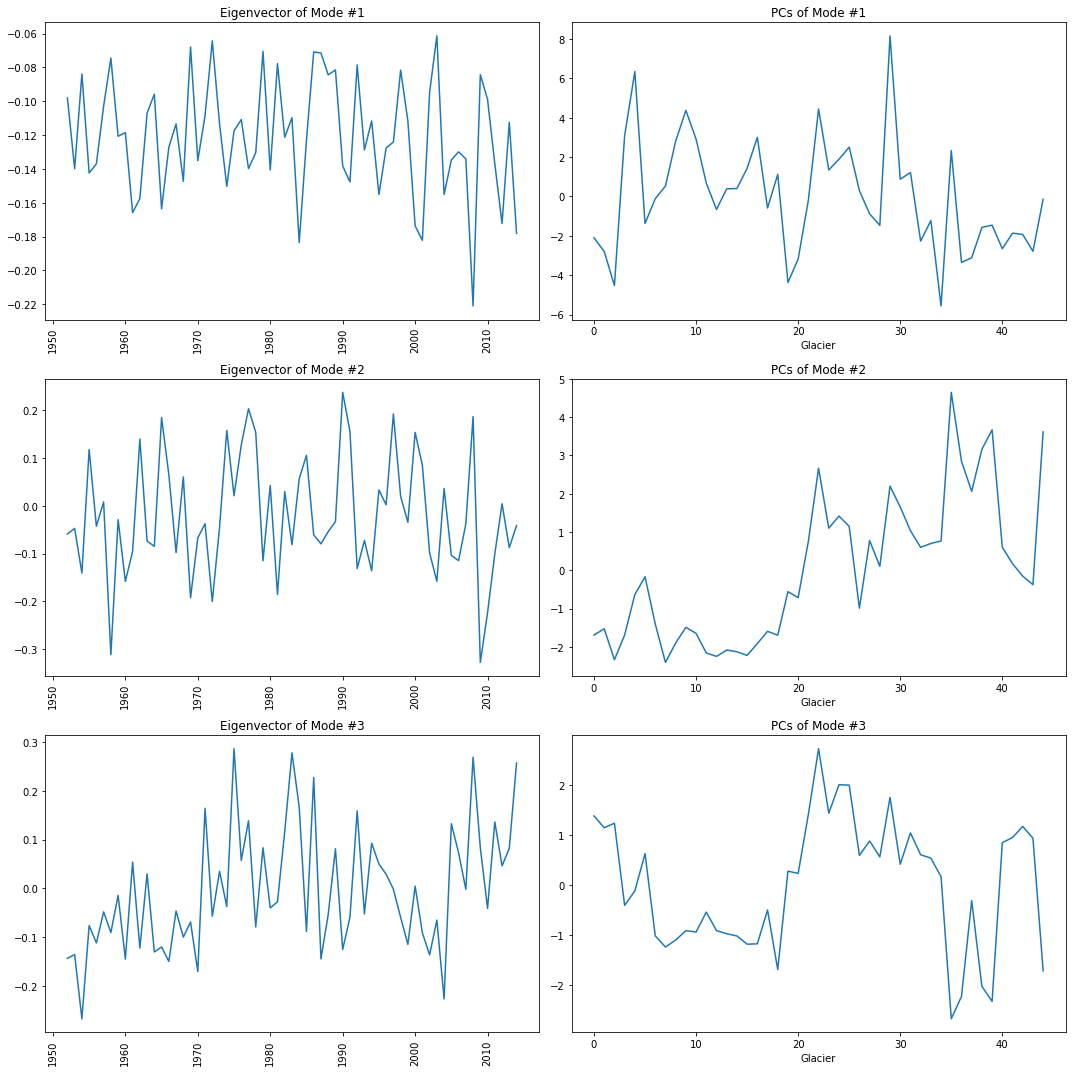

In [8]:
#plot the first n modes and PCs -- choose a value of 'n' from the variance explained figure!

n = 3

plt.figure(figsize=(15,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.plot(range(minYear,maxYear+1),eigvecs[kk,:])
    plt.xticks(rotation=90)
    plt.title('Eigenvector of Mode #' + str(kk+1))
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Glacier')
    
    plt.tight_layout()

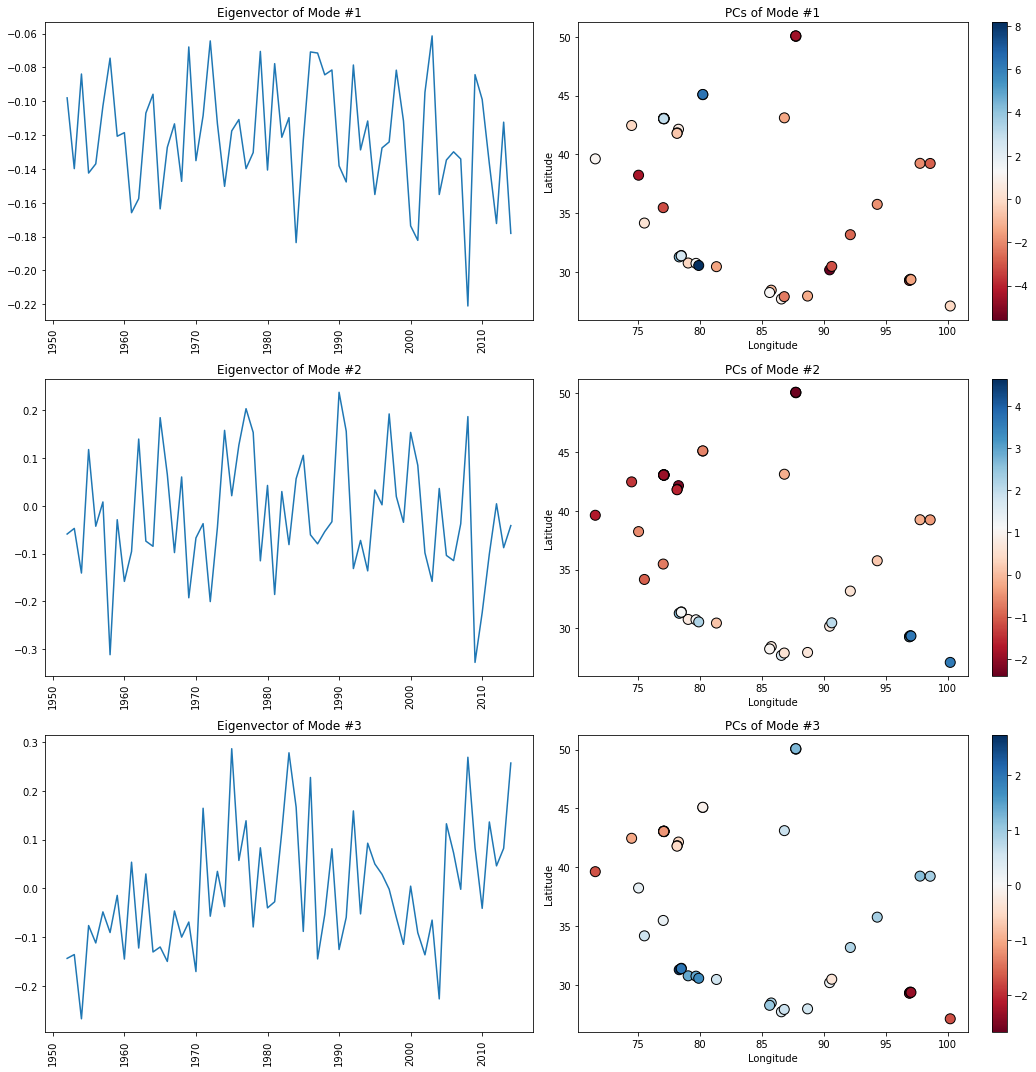

In [9]:
#alternatively, we can express the PC plots as scatter plots on a map, with the colour representing the PC value.  This shows us how the temporal patterns are expressed spatially!

n = 3

plt.figure(figsize=(15,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.plot(range(minYear,maxYear+1),eigvecs[kk,:])
    plt.xticks(rotation=90)
    plt.title('Eigenvector of Mode #' + str(kk+1))
    
    plt.subplot(n,2,(kk+1)*2)
    plt.scatter(lon, lat,
            c = PCs[:,kk],
            cmap = 'RdBu',
            edgecolor='k',
            s = 100)
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar()
    
    plt.tight_layout()
    
#Pretty cool!  Check out that NW-SE (linear?) gradient displayed by the second mode, and the low-high-low pattern shown by the third mode.

What are the most characteristic spatial patterns of glacier mass balance? How do these patterns evolve in the given period 1952-2014? 

Here we look for eigenvectors to represent the spatial patterns, while PCs will represent how these patterns are expressed for each year.

To do this, we do the same thing as above, but we use the transpose of the input data!


In [10]:
#do PCA 

data = data.T

n_modes = np.min(np.shape(data))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

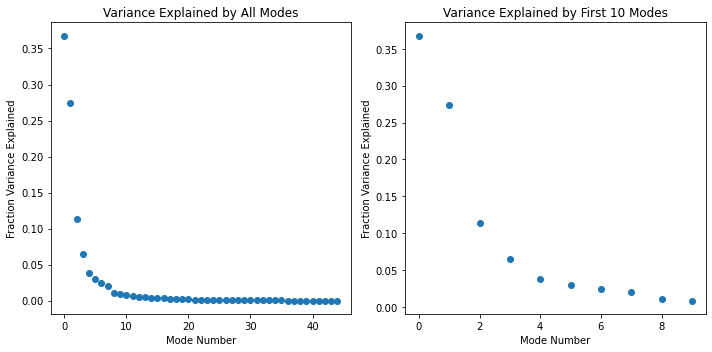

In [11]:
#plot fraction of variance explained by each mode

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

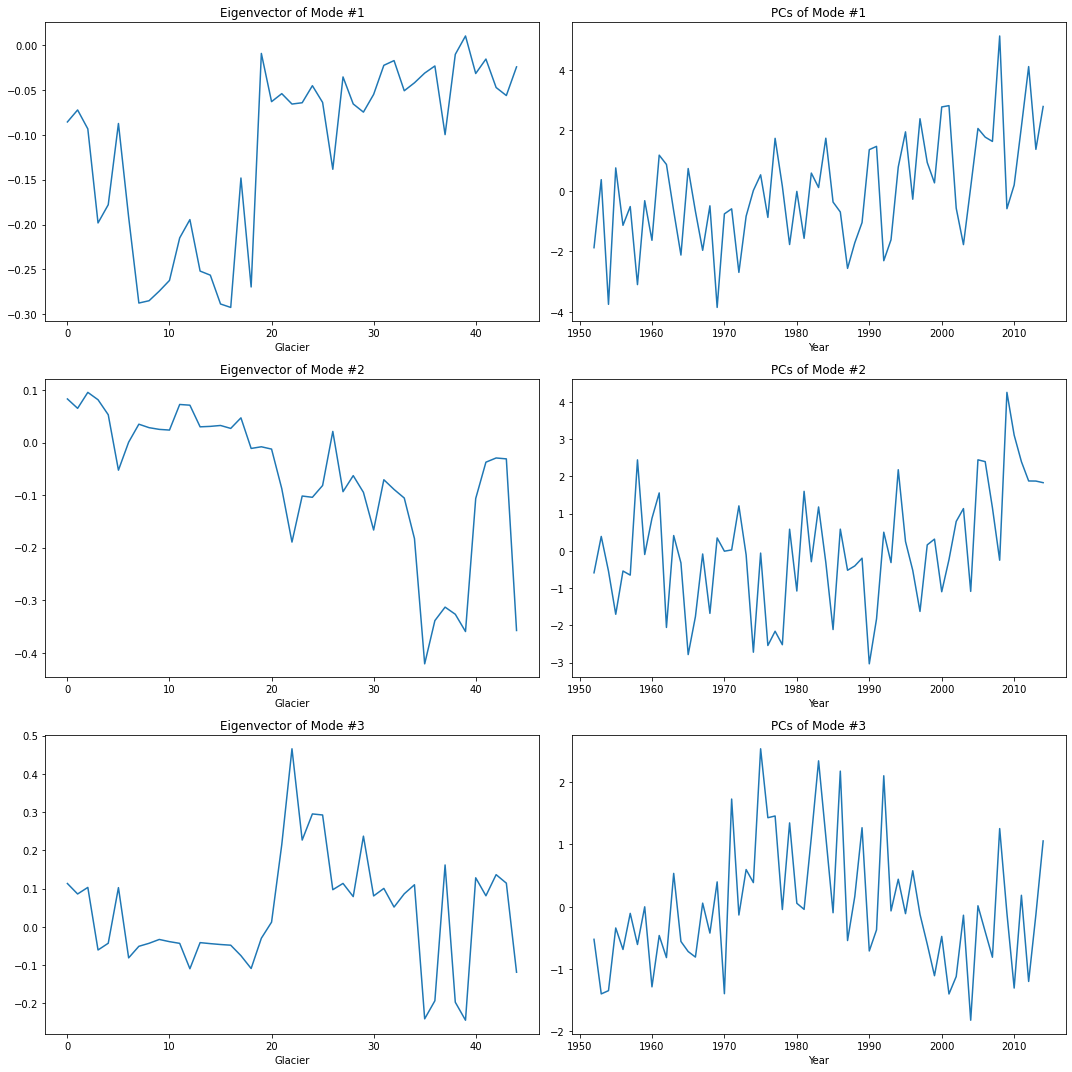

In [12]:
#plot the first n modes and PCs -- choose a value of 'n' from the variance explained figure!

n = 3

plt.figure(figsize=(15,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.plot(eigvecs[kk,:])
    plt.title('Eigenvector of Mode #' + str(kk+1))
    plt.xlabel('Glacier')
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(range(minYear,maxYear+1),PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Year')
    
    plt.tight_layout()

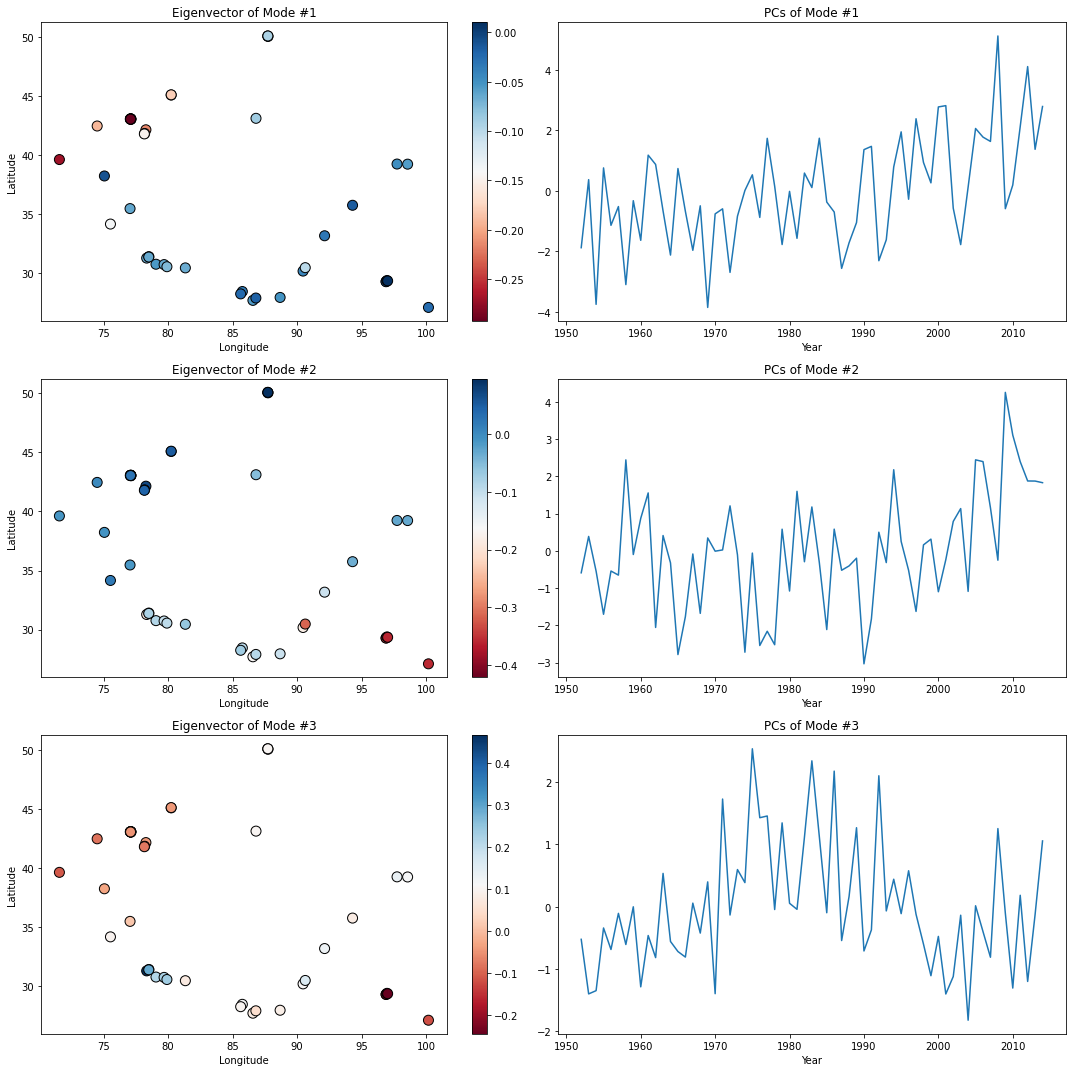

In [13]:
#alternatively, we can express the eigenvector plots as scatter plots on a map.  
#So now, the eigenvectors are showing us the spatial patterns, while the PCs are showing us the temporal patterns!

n = 3

plt.figure(figsize=(15,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.scatter(lon, lat,
            c = eigvecs[kk,:],
            cmap = 'RdBu',
            edgecolor='k',
            s = 100)
    plt.title('Eigenvector of Mode #' + str(kk+1))
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar()
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(range(minYear,maxYear+1),PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Year')
    
    plt.tight_layout()